In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [27]:
# loading the csv data to a Pandas DataFrame
phone_data = pd.read_csv('data/Smartphone_Usage_Productivity.csv')

In [28]:
# print firs 5 rows of the dataset
phone_data.head()

,User_ID,Age,Gender,Occupation,Device_Type,Daily_Phone_Hours,Social_Media_Hours,Work_Productivity_Score,Sleep_Hours,Stress_Level,App_Usage_Count,Caffeine_Intake_Cups,Weekend_Screen_Time_Hours
0,U1,58,Male,Professional,Android,1.3,6.7,6,8.8,4,42,1,8.7
1,U2,25,Male,Professional,Android,1.2,1.5,5,6.4,1,51,3,5.1
2,U3,19,Male,Student,iOS,5.3,5.7,5,9.0,4,14,5,6.3
3,U4,35,Female,Business Owner,iOS,5.8,2.5,2,5.7,3,36,6,12.8
4,U5,33,Male,Freelancer,Android,7.9,1.3,4,5.7,3,37,5,9.9


In [29]:
# print last 5 rows of the dataset
phone_data.tail()

,User_ID,Age,Gender,Occupation,Device_Type,Daily_Phone_Hours,Social_Media_Hours,Work_Productivity_Score,Sleep_Hours,Stress_Level,App_Usage_Count,Caffeine_Intake_Cups,Weekend_Screen_Time_Hours
49995,U49996,44,Male,Business Owner,Android,5.9,5.4,5,6.6,1,11,5,3.0
49996,U49997,42,Other,Business Owner,Android,2.9,7.4,9,6.3,2,20,4,6.2
49997,U49998,27,Female,Freelancer,iOS,1.4,2.5,4,6.7,9,39,4,5.1
49998,U49999,41,Female,Business Owner,iOS,8.9,3.0,6,5.5,2,51,0,9.2
49999,U50000,46,Other,Freelancer,Android,8.8,2.8,3,5.4,1,54,5,6.9


In [30]:
# number of rows and columns in the dataset
phone_data.shape

(50000, 13)

In [31]:
# getting some info about the data
phone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    50000 non-null  object 
 1   Age                        50000 non-null  int64  
 2   Gender                     50000 non-null  object 
 3   Occupation                 50000 non-null  object 
 4   Device_Type                50000 non-null  object 
 5   Daily_Phone_Hours          50000 non-null  float64
 6   Social_Media_Hours         50000 non-null  float64
 7   Work_Productivity_Score    50000 non-null  int64  
 8   Sleep_Hours                50000 non-null  float64
 9   Stress_Level               50000 non-null  int64  
 10  App_Usage_Count            50000 non-null  int64  
 11  Caffeine_Intake_Cups       50000 non-null  int64  
 12  Weekend_Screen_Time_Hours  50000 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usag

In [32]:
# checking for missing values
phone_data.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Occupation                   0
Device_Type                  0
Daily_Phone_Hours            0
Social_Media_Hours           0
Work_Productivity_Score      0
Sleep_Hours                  0
Stress_Level                 0
App_Usage_Count              0
Caffeine_Intake_Cups         0
Weekend_Screen_Time_Hours    0
dtype: int64

In [33]:
# statistical measures about the data
phone_data.describe()

,Age,Daily_Phone_Hours,Social_Media_Hours,Work_Productivity_Score,Sleep_Hours,Stress_Level,App_Usage_Count,Caffeine_Intake_Cups,Weekend_Screen_Time_Hours
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,39.034960,6.509116,4.267250,5.503760,6.497744,5.504500,32.43898,3.004580,8.006844
std,12.414877,3.170903,2.164743,2.874806,1.449551,2.871095,16.12151,1.996657,3.461300
min,18.000000,1.000000,0.500000,1.000000,4.000000,1.000000,5.00000,0.000000,2.000000
25%,28.000000,3.800000,2.400000,3.000000,5.200000,3.000000,18.00000,1.000000,5.000000
50%,39.000000,6.500000,4.300000,5.500000,6.500000,6.000000,32.00000,3.000000,8.000000
75%,50.000000,9.200000,6.100000,8.000000,7.800000,8.000000,46.00000,5.000000,11.000000
max,60.000000,12.000000,8.000000,10.000000,9.000000,10.000000,60.00000,6.000000,14.000000


In [34]:
# checking the distribution of Stress_Level Variable
phone_data['Stress_Level'].value_counts()

Stress_Level
5     5096
6     5076
2     5058
10    5031
3     5009
9     4993
8     4993
1     4940
7     4933
4     4871
Name: count, dtype: int64

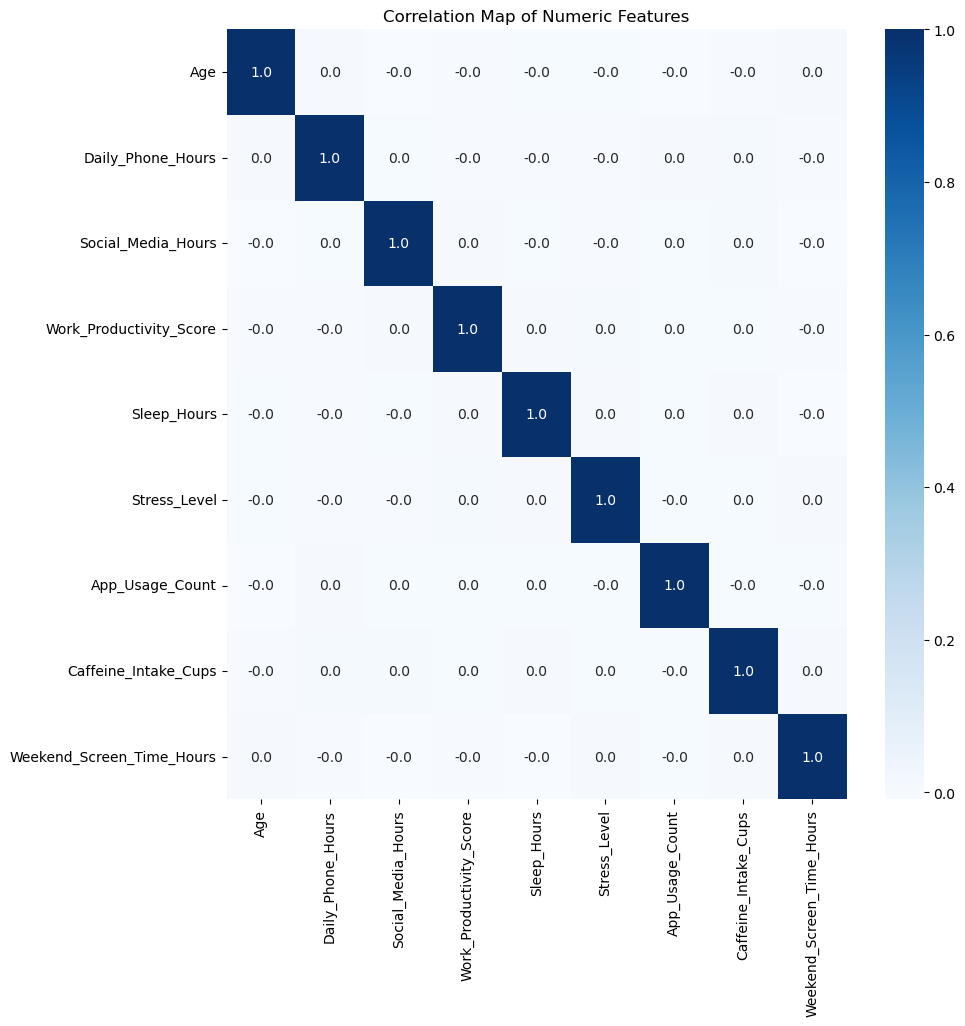

In [35]:
# Correlation Heatmap
phone_data.drop('User_ID', axis=1, inplace=True)

numeric_data = phone_data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10,10))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.1f', cmap='Blues')
plt.title('Correlation Map of Numeric Features')
plt.show()

Preprocessing - Encoding Categorical Variables

In [36]:
# Label Encoding for categorical variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
phone_data['Gender'] = le.fit_transform(phone_data['Gender'])
phone_data['Occupation'] = le.fit_transform(phone_data['Occupation'])
phone_data['Device_Type'] = le.fit_transform(phone_data['Device_Type'])

phone_data.head()

,Age,Gender,Occupation,Device_Type,Daily_Phone_Hours,Social_Media_Hours,Work_Productivity_Score,Sleep_Hours,Stress_Level,App_Usage_Count,Caffeine_Intake_Cups,Weekend_Screen_Time_Hours
0,58,1,2,0,1.3,6.7,6,8.8,4,42,1,8.7
1,25,1,2,0,1.2,1.5,5,6.4,1,51,3,5.1
2,19,1,3,1,5.3,5.7,5,9.0,4,14,5,6.3
3,35,0,0,1,5.8,2.5,2,5.7,3,36,6,12.8
4,33,1,1,0,7.9,1.3,4,5.7,3,37,5,9.9


Splitting the Features and Target

In [37]:
X = phone_data.drop('Stress_Level', axis=1)
y = phone_data['Stress_Level']

In [38]:
print(X.head())

   Age  Gender  Occupation  Device_Type  Daily_Phone_Hours  \
0   58       1           2            0                1.3   
1   25       1           2            0                1.2   
2   19       1           3            1                5.3   
3   35       0           0            1                5.8   
4   33       1           1            0                7.9   

   Social_Media_Hours  Work_Productivity_Score  Sleep_Hours  App_Usage_Count  \
0                 6.7                        6          8.8               42   
1                 1.5                        5          6.4               51   
2                 5.7                        5          9.0               14   
3                 2.5                        2          5.7               36   
4                 1.3                        4          5.7               37   

   Caffeine_Intake_Cups  Weekend_Screen_Time_Hours  
0                     1                        8.7  
1                     3                 

In [39]:
print(y.head())

0    4
1    1
2    4
3    3
4    3
Name: Stress_Level, dtype: int64


Splitting the Data into Training Data & Test Data

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [41]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 11) (40000, 11) (10000, 11)


Model Training

Logistic Regression

In [42]:
model = LogisticRegression(max_iter=1000)

In [43]:
# training the LogisticRegression model with Training data
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Model Evaluation

Accuracy Score

In [44]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [45]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.10885


In [46]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [47]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.0995


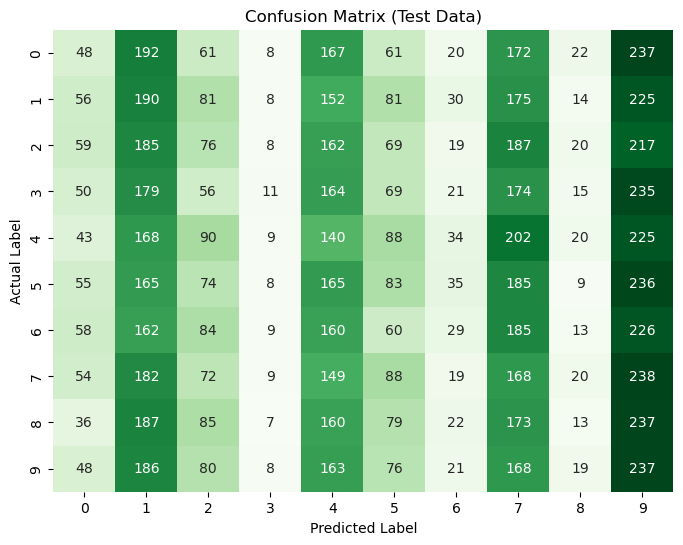

In [48]:
# Confusion Matrix for Test Data
cm = confusion_matrix(y_test, X_test_prediction)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix (Test Data)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

F1 Score

In [49]:
# Calculate F1 Score (weighted average for multi-class)
f1 = f1_score(y_test, X_test_prediction, average='weighted')
print('F1 Score (weighted): ', f1)

F1 Score (weighted):  0.08447086333010585


Building a Predictive System

In [50]:
# Sample input data (Age, Gender, Occupation, Device_Type, Daily_Phone_Hours, Social_Media_Hours, Work_Productivity_Score, Sleep_Hours, App_Usage_Count, Caffeine_Intake_Cups, Weekend_Screen_Time_Hours)
# Gender: 0=Female, 1=Male, 2=Other
# Occupation: 0=Business Owner, 1=Freelancer, 2=Professional, 3=Student
# Device_Type: 0=Android, 1=iOS

input_data = (25, 1, 3, 0, 8.5, 4.2, 5, 6.5, 25, 3, 7.5)

columns = ['Age', 'Gender', 'Occupation', 'Device_Type', 'Daily_Phone_Hours', 
           'Social_Media_Hours', 'Work_Productivity_Score', 'Sleep_Hours', 
           'App_Usage_Count', 'Caffeine_Intake_Cups', 'Weekend_Screen_Time_Hours']

input_df = pd.DataFrame([input_data], columns=columns)

prediction = model.predict(input_df)

print(f'Predicted Stress Level: {prediction[0]}')

Predicted Stress Level: 10
